<a href="https://www.kaggle.com/code/hgvaishnavi/2-data-and-sampling-distributions-r?scriptVersionId=218328644" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**DATA AND SAMPLING DISTRIBUTIONS**

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(boot)
library(ggplot2)
library(gridExtra)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

loans_income <- read.csv('/kaggle/input/practical-statistics-for-data-science/loans_income.csv')
loans_income <- loans_income[, 1]   # convert data frame to vector
sp500_px <- read.csv('/kaggle/input/practical-statistics-for-data-science/sp500_data.csv')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘gridExtra’




The following object is masked from ‘package:dplyr’:

    combine




## **1. RANDOM SAMPLING AND SAMPLE BIAS**

A **sample** (n) is a subset of data from a larger data set; this larger data set is called the **population** (N).

### **A. Bias**

Bias refers to measurement or sampling errors that are systematic and produced by the measurement or sampling process. 

An important distinction should be made between *errors due to random chance* and *errors due to bias*.

### **B. Random Selection**

**Random sampling** is a process in which each available member of the population being sampled has an equal chance of being chosen for the sample at each draw. The sample that results is called a *simple random sample*. 

Sampling can be done with *replacement*, in which observations are put back in the population after each draw for possible future reselection. Or it can be done *without replacement*, in which case observations, once selected, are unavailable for future draws.

**Stratified sampling**: Dividing the population into strata and randomly sampling from each strata.

**Stratum** (Strata): A homogeneous subgroup of a population with common characteristics.

### **C. Size Versus Quality: When Does Size Matter?**

*Data quality often matters more than data quantity* when making an estimate or a model based on a sample. 

**Data quality** in data science involves *completeness, consistency of format, cleanliness, and accuracy of individual data points*.

So when are massive amounts of data needed?

The classic scenario for the value of big data is when the data is not only big but sparse as well. Consider the search queries received by Google, where columns are terms, rows are individual search queries, and cell values are either 0 or 1, depending on whether a query contains a term. The goal is to determine the best predicted search destination for a given query. There are over 150,000 words in the English language, and Google processes over one trillion queries per year. This yields a huge matrix, the vast majority of whose entries are “0.”

In such cases, data quantity is important.

### **D. Sample Mean Versus Population Mean**

The symbol **x** (pronounced “x-bar”) is used to represent the *mean of a sample* from a population, whereas **μ** is used to represent the *mean of a population*. 

Information about samples is observed, and information about large
populations is often inferred from smaller samples.

## **2. SELECTION BIAS**

**Selection bias** refers to the practice of selectively choosing data consciously or unconsciously—in a way that leads to a conclusion that is misleading or ephemeral.

**Data snooping** refers to the extensive hunting through the data until something interesting emerges.

**Vast search effect**: Bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables.

### **A. Regression to the mean**
Regression to the mean refers to a phenomenon involving successive measurements on a given variable: extreme observations tend to be followed by more central ones. 

Attaching special focus and meaning to the extreme value can lead to a form of selection bias.

## **3. SAMPLING DISTRIBUTION OF A STATISTIC**

The term **sampling distribution of a statistic** refers to the distribution of some sample statistic over many samples drawn from the same population.

**Sample statistic**: A metric calculated for a sample of data drawn from a larger population.

**Data distribution**: The frequency distribution of individual values in a data set.

**Sampling distribution**: The frequency distribution of a sample statistic over many samples or resamples.

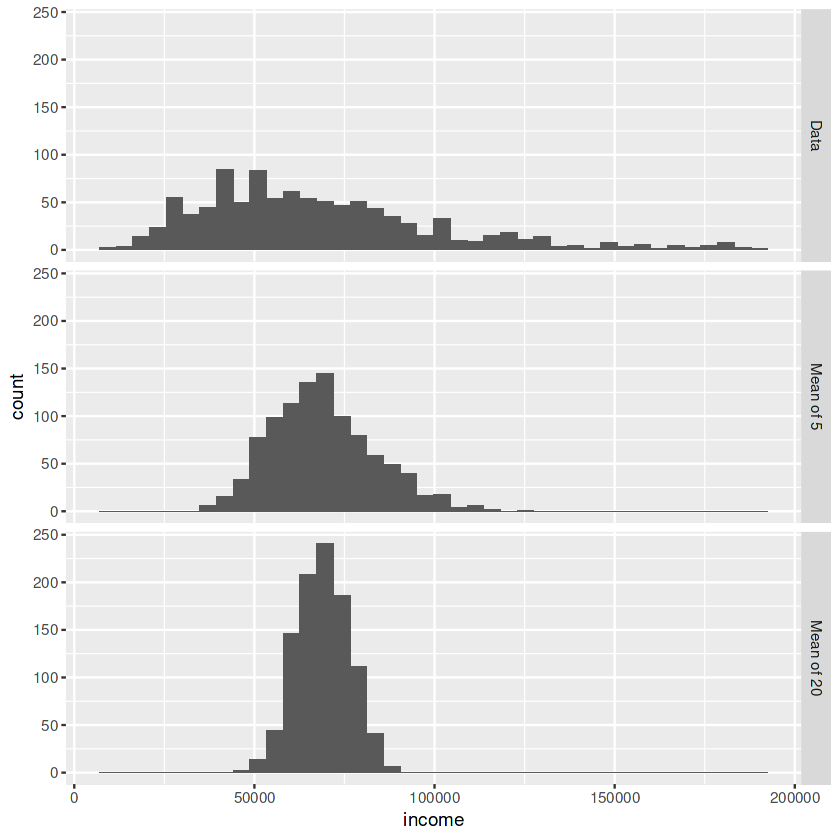

In [2]:
# Histogram of annual incomes of 1000 loan applicants (top), then 1000 means of n=5 applicants (middle), and finally 1000 means of n=20 applicants (bottom)

library(ggplot2)

# take a simple random sample
samp_data <- data.frame(income=sample(loans_income, 1000), 
                        type='data_dist')

# take a sample of means of 5 values
samp_mean_05 <- data.frame(
    income = tapply(sample(loans_income, 1000*5),
                    rep(1:1000, rep(5, 1000)), FUN=mean),
    type = 'mean_of_5')

# take a sample of means of 20 values
samp_mean_20 <- data.frame(
    income = tapply(sample(loans_income, 1000*20),
                    rep(1:1000, rep(20, 1000)), FUN=mean),
    type = 'mean_of_20')

# bind the data.frames and convert type to a factor
income <- rbind(samp_data, samp_mean_05, samp_mean_20)

income$type = factor(income$type,
                     levels=c('data_dist', 'mean_of_5', 'mean_of_20'),
                     labels=c('Data', 'Mean of 5', 'Mean of 20'))

# plot the histograms
ggplot(income, aes(x=income)) + 
    geom_histogram(bins=40) + 
    facet_grid(type ~ .)

In [3]:
head(loans_income)
head(samp_data)
head(samp_mean_05)
head(samp_mean_20)
head(income)

[1]  67000  52000 100000  78762  37041  33000

,income,type
,<int>,<chr>
1,80000,data_dist
2,52000,data_dist
3,72000,data_dist
4,33000,data_dist
5,45000,data_dist
6,125000,data_dist


,income,type
,<dbl>,<chr>
1,77236.8,mean_of_5
2,67280.0,mean_of_5
3,62900.0,mean_of_5
4,67480.0,mean_of_5
5,66660.0,mean_of_5
6,72424.0,mean_of_5


,income,type
,<dbl>,<chr>
1,69220.20,mean_of_20
2,49244.15,mean_of_20
3,67075.00,mean_of_20
4,61165.80,mean_of_20
5,58424.90,mean_of_20
6,70378.20,mean_of_20


,income,type
,<dbl>,<fct>
1,80000,Data
2,52000,Data
3,72000,Data
4,33000,Data
5,45000,Data
6,125000,Data


### **A. Central Limit Theorem**

**Central limit theorem** says that the means drawn from multiple samples will resemble the familiar bell-shaped normal curve, even if the source population is not normally distributed, provided that the sample size is large enough and the departure of the data from normality is not too great.

### **B. Standard Error**

The standard error is a single metric that sums up the variability in the sampling distribution for a statistic.

*Do not confuse standard deviation (which measures the variability of individual data points) with standard error (which measures the variability of a sample metric).*

The standard error can be estimated using a statistic based on the standard deviation s of the sample values, and the sample size n: Standard error = SE = s/sqrt(n)

The relationship between standard error and sample size is sometimes referred to as the square root of n rule: to reduce the standard error by a
factor of 2, the sample size must be increased by a factor of 4.

## **4. THE BOOTSTRAP**

One easy and effective way to estimate the sampling distribution of a statistic, or of model parameters, is to draw additional samples, with replacement, from the sample itself and recalculate the statistic or model for each resample. This procedure is called the *bootstrap*, and it does not necessarily involve any assumptions about the data or the sample statistic being normally distributed.

**Bootstrap sample**: A sample taken with replacement from an observed data set.

**Resampling**: The process of taking repeated samples from observed data; includes both bootstrap and permutation (shuffling) procedures.

The algorithm for a bootstrap resampling of the mean, for a sample of size n, is as follows:
1. Draw a sample value, record it, and then replace it.
2. Repeat n times.
3. Record the mean of the n resampled values.
4. Repeat steps 1–3 R times.
5. Use the R results to:
   
   a. Calculate their standard deviation (this estimates sample mean standard error).
   
   b. Produce a histogram or boxplot.
   
   c. Find a confidence interval.

R, the number of iterations of the bootstrap, is set somewhat arbitrarily. The more iterations you do, the more accurate the estimate of the standard error, or the confidence interval. 

The result from this procedure is a bootstrap set of sample statistics or estimated model parameters, which you can then examine to see how variable they are.

In [4]:
stat_fun <- function(x, idx) median(x[idx])
boot_obj <- boot(loans_income, R=1000, statistic=stat_fun)

boot_obj


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = loans_income, statistic = stat_fun, R = 1000)


Bootstrap Statistics :
    original   bias    std. error
t1*    62000 -72.0195    213.5739

The original estimate of the median is 62000. The bootstrap distribution indicates that the estimate has a bias of about –70 and a standard error of 209. The results will vary slightly between consecutive runs of the algorithm.

With classification and regression trees (also called decision trees),
running multiple trees on bootstrap samples and then averaging their predictions generally performs better than using a single tree. This process is called **bagging** (short for “bootstrap aggregating)

### **A. Resampling Versus Bootstrapping**

The term **resampling** includes permutation procedures where multiple samples are combined and the *sampling may be done without replacement*. In any case, the term **bootstrap** always implies *sampling with replacement* from an observed data set.

## **5. CONFIDENCE INTERVALS**

Confidence intervals always come with a coverage level, expressed as a (high) percentage, say 90% or 95%. 

One way to think of a 90% confidence interval is as follows: it is the interval that encloses the central 90% of the bootstrap sampling distribution of a sample statistic.

**Confidence level**: The percentage of confidence intervals, constructed in the same way from the same population, that are expected to contain the statistic of interest.

**Interval endpoints** The top and bottom of the confidence interval.

Given a sample of size n, and a sample statistic of interest, the algorithm for a bootstrap confidence interval is as follows:
1. Draw a random sample of size n with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many (R) times.
4. For an x% confidence interval, trim [(100-x) / 2]% of the R resample results from either end of the distribution.
5. The trim points are the endpoints of an x% bootstrap confidence interval.

ci,y
<dbl>,<dbl>
51088.85,9
65704.19,11


Sample Mean:

[1] 58447.25

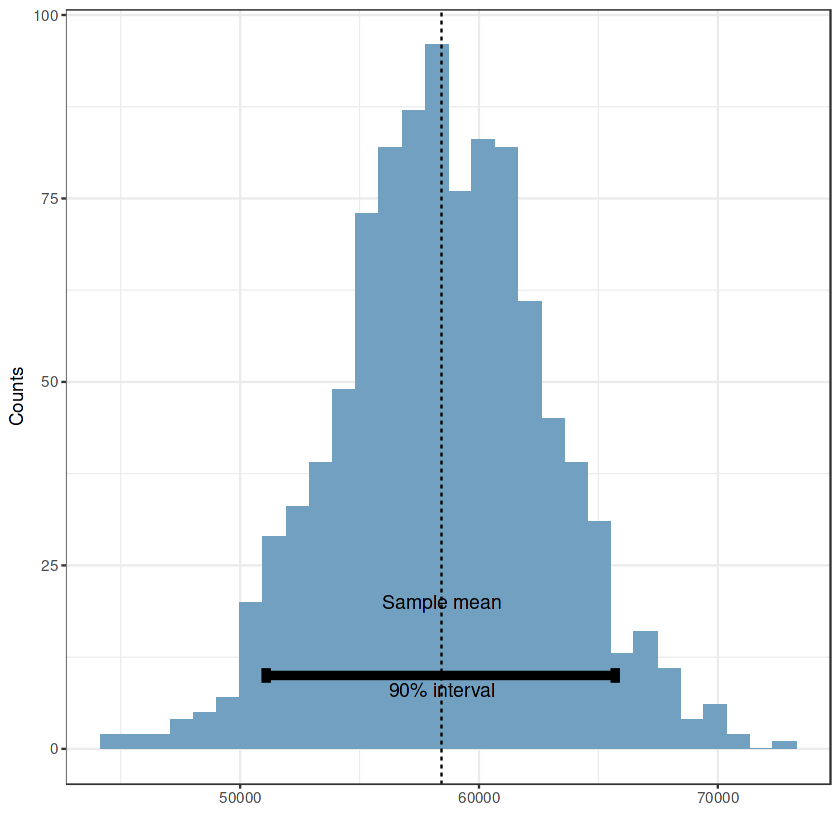

In [5]:
# Bootstrap confidence interval for the annual income of loan applicants, based on a sample of 20

set.seed(5)
set.seed(7)
sample20 <- sample(loans_income, 20)
sampleMean <- mean(sample20)

stat_fun <- function(x, idx) mean(x[idx])
boot_obj <- boot(sample20, R=1000, statistic=stat_fun)
boot_ci <- boot.ci(boot_obj, conf=0.9, type='basic')
X <- data.frame(mean=boot_obj$t)
ci90 <- boot_ci$basic[4:5]
ci <- data.frame(ci=ci90, y=c(9, 11))
ci
cat("Sample Mean:")
sampleMean
ggplot(X, aes(x=mean)) +
    geom_histogram(bins=30, fill='#72A0C1') +
    geom_vline(xintercept=sampleMean, linetype=2) +
    geom_path(aes(x=ci, y=10), data=ci, linewidth=2) +
    geom_path(aes(x=ci90[1], y=y), data=ci, linewidth=2) +
    geom_path(aes(x=ci90[2], y=y), data=ci, linewidth=2) +
    annotate('text', x=sampleMean, y=20, label='Sample mean', size=4) +
    annotate('text', x=sampleMean, y=8, label='90% interval', size=4) +
    theme_bw() + 
    labs(x='', y='Counts')

## **6. NORMAL DISTRIBUTION**

Normal distribution (Gaussian distribution), is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. The normal distribution appears as a *bell curve* when graphed.


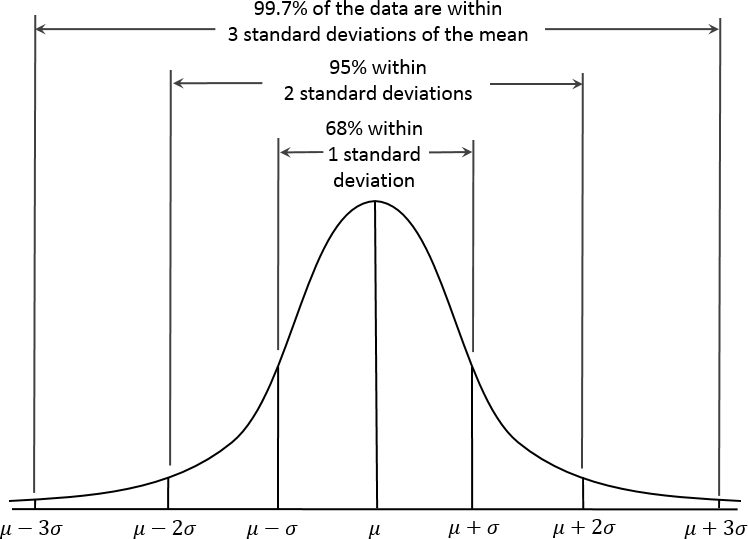



**Error**: The difference between a data point and a predicted or average value.

**Standardize**: Subtract the mean and divide by the standard deviation.

**z-score**: The result of standardizing an individual data point.

**Standard normal**: A normal distribution with mean = 0 and standard deviation = 1.

**QQ-Plot**: A plot to visualize how close a sample distribution is to a specified distribution, e.g., the normal distribution.

### **A. Standard Normal and QQ Plots**

A **standard normal distribution** is one in which the units on the x-axis are expressed in terms of *standard deviations away from the mean*. 

To compare data to a standard normal distribution, you subtract the mean and then divide by the standard deviation; this is also called *normalization* or *standardization*. 

The transformed value is termed a *z-score*, and the normal distribution is sometimes called the *z-distribution*.

A **QQ-Plot** is used to visually determine how close a sample is to a specified distribution. 

The QQ-Plot orders the z-scores from low to high and plots each value’s *z-score on the y-axis*; the x-axis is the corresponding quantile of a normal distribution for that value’s rank.

If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal.

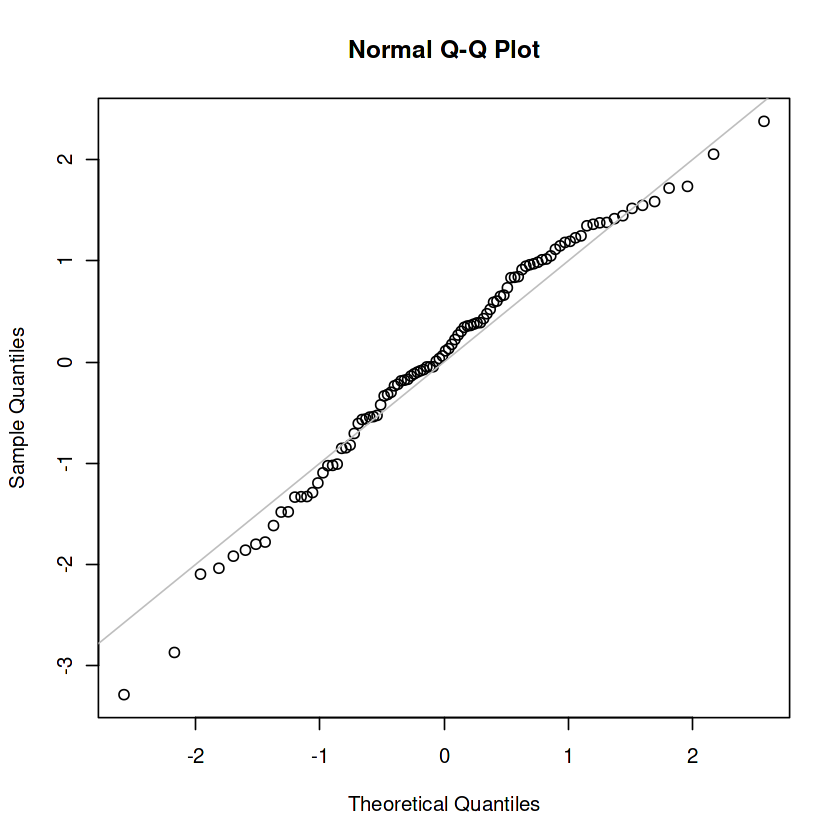

In [6]:
# QQ-Plot of a sample of 100 values drawn from a standard normal distribution

norm_samp <- rnorm(100)
qqnorm(norm_samp)
abline(a=0, b=1, col='grey')

## **7. LONG-TAILED DISTRIBUTION**

A statistical distribution that has a large number of occurrences far from the central part of the distribution. It's also known as a heavy-tailed distribution.

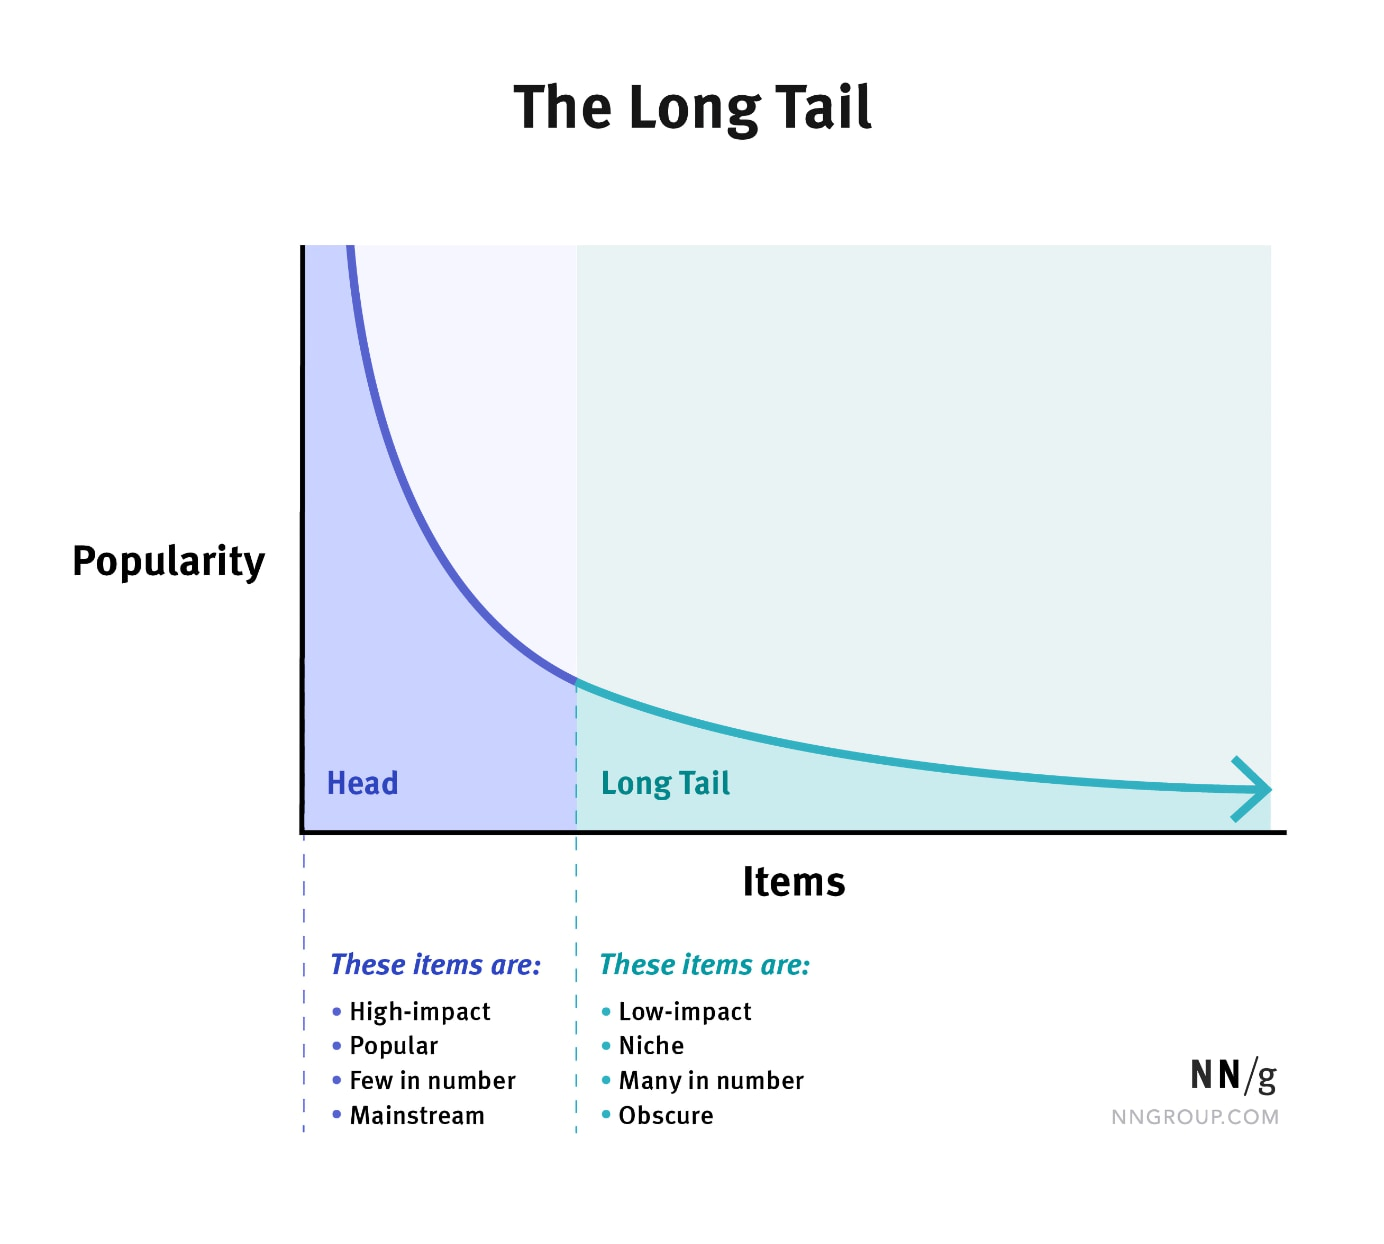


**Tail**: The long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.

**Skew**: Where one tail of a distribution is longer than the other.
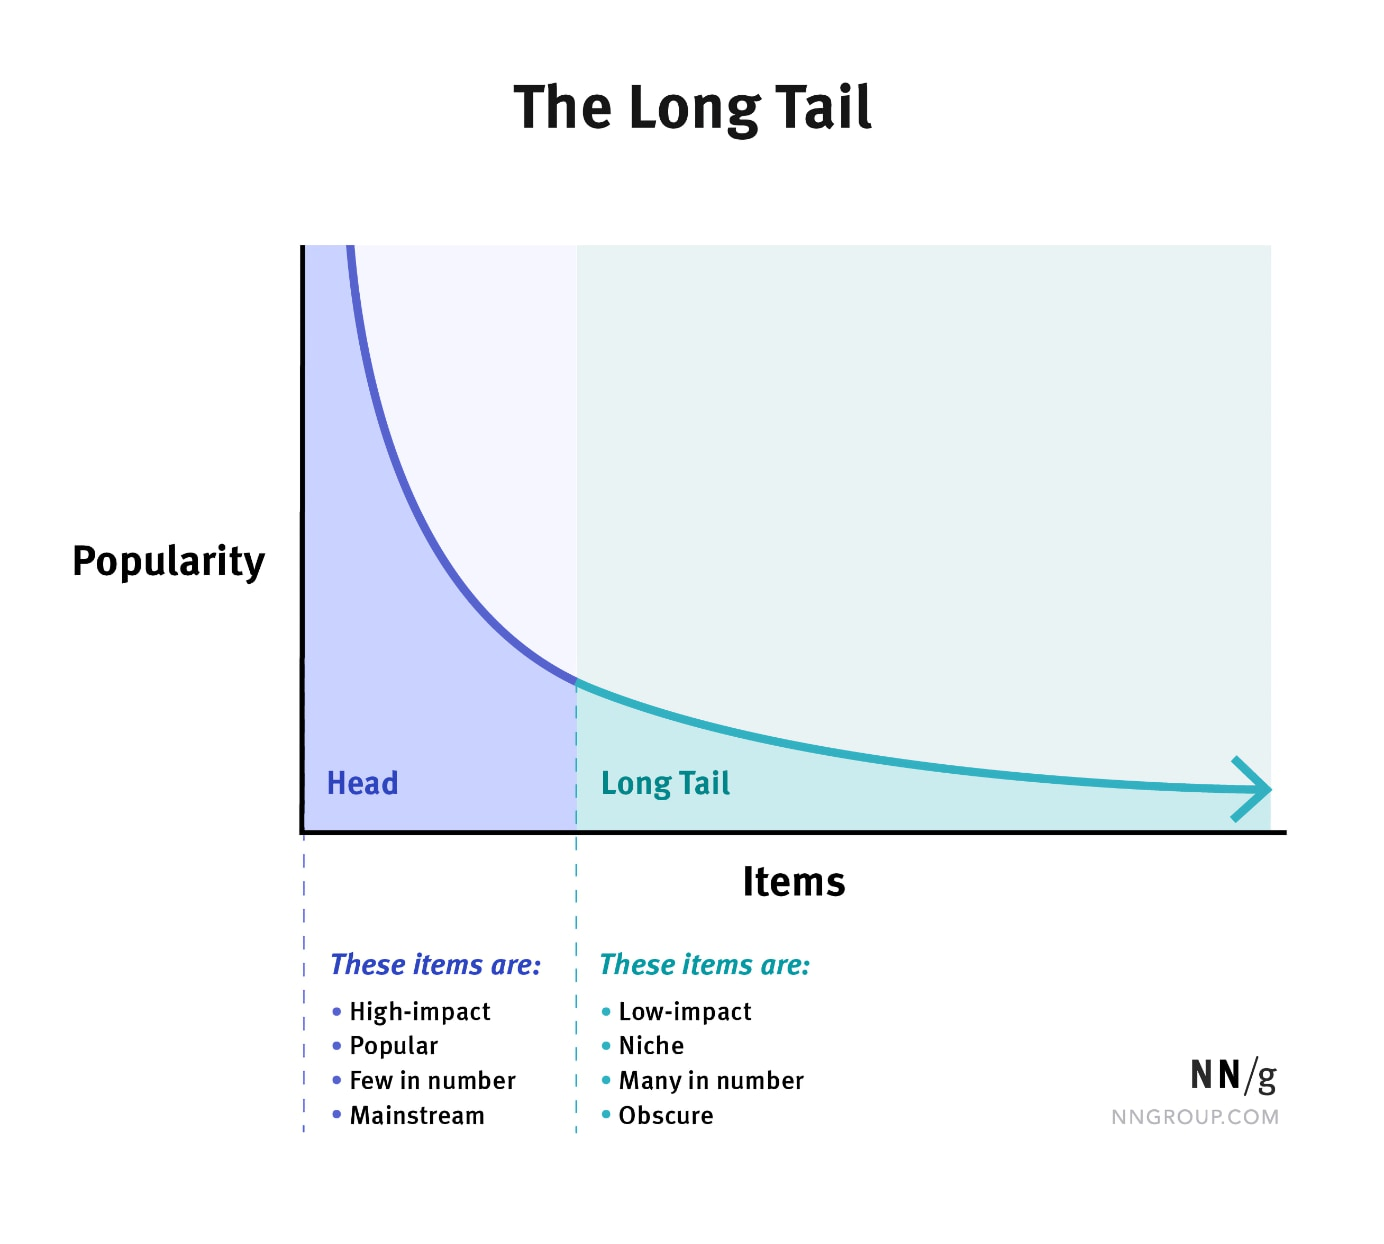

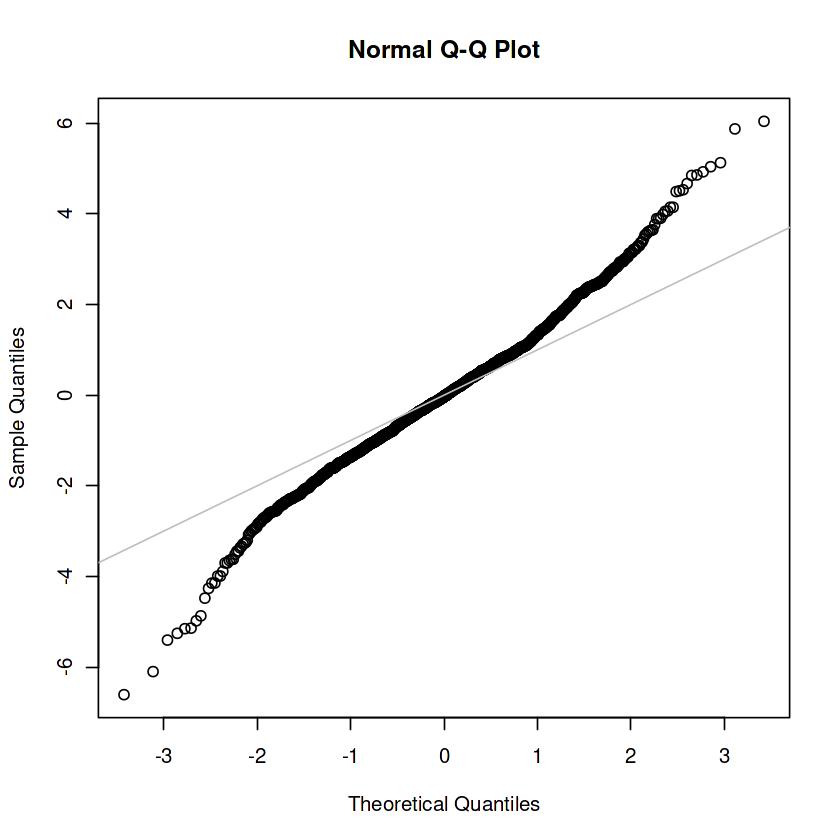

In [7]:
# QQ-Plot of the returns for Netflix (NFLX)

nflx <- sp500_px[,'NFLX']
nflx <- diff(log(nflx[nflx>0]))
qqnorm(nflx)
abline(a=0, b=1, col='grey')

The points are far below the line for low values and far above the line for high values, indicating the data are not normally distributed.

• Most data is not normally distributed.

• Assuming a normal distribution can lead to underestimation of extreme events (“black swans”).

## **8. STUDENTS'S t-DISTRIBUTION**

The t-distribution is a normally shaped distribution, except that it is a *bit thicker and longer on the tails*.

Distributions of sample means are typically shaped like a t-distribution, and there is a family of t-distributions that differ depending on how large the sample is. 

*The larger the sample, the more normally shaped the t-distribution becomes.*

**n**: Sample size.

**Degrees of freedom**: A parameter that allows the t-distribution to adjust to different sample sizes, statistics, and numbers of groups.

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


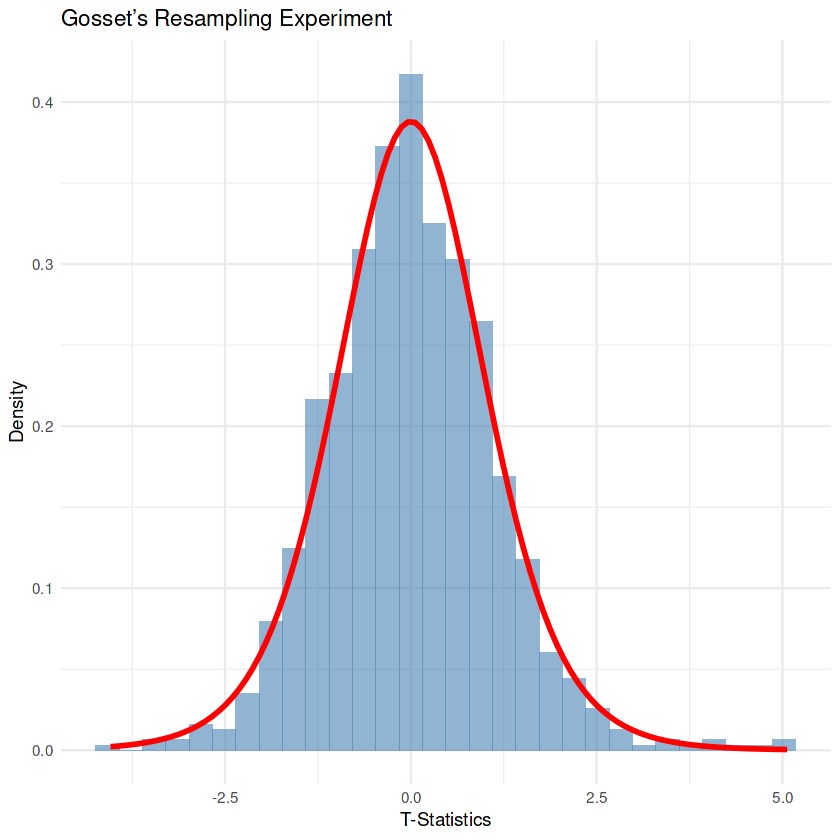

In [8]:
# Set seed for reproducibility
set.seed(123)  

# Generate 1000 resampled t-statistics
t_stats <- replicate(1000, { 
  x <- rnorm(10)  # Sample 10 random values from a normal distribution
  mean(x) / (sd(x) / sqrt(10))  # Compute t-statistic
})

# Create histogram with fitted t-curve
ggplot(data.frame(T = t_stats), aes(x = T)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "steelblue", alpha = 0.6) +  # Histogram of t-statistics
  stat_function(fun = dt, args = list(df = 9), color = "red", linewidth = 1.2) +  # Overlay theoretical t-distribution
  labs(title = "Gosset’s Resampling Experiment", x = "T-Statistics", y = "Density") +  # Add labels
  theme_minimal()  # Apply minimal theme

## **9. BINOMIAL DISTRIBUTION**

Binomial distribution is the idea of a set of trials, each trial having two possible outcomes with definite probabilities.

The binomial distribution is the frequency distribution of the number of successes (x) in a given number of trials (n) with specified probability (p) of success in each trial.

**Trial**: An event with a discrete outcome (e.g., a coin flip).
<br>**Success**: The outcome of interest for a trial.
<br>   *Synonym: “1” (as opposed to “0”)*
<br>**Binomial**: Having two outcomes.
<br>    *Synonyms: yes/no, 0/1, binary*
<br>**Binomial trial**: A trial with two outcomes.
<br>    *Synonym: Bernoulli trial*
<br>**Binomial distribution**: Distribution of number of successes in x trials.
<br>    *Synonym: Bernoulli distribution*

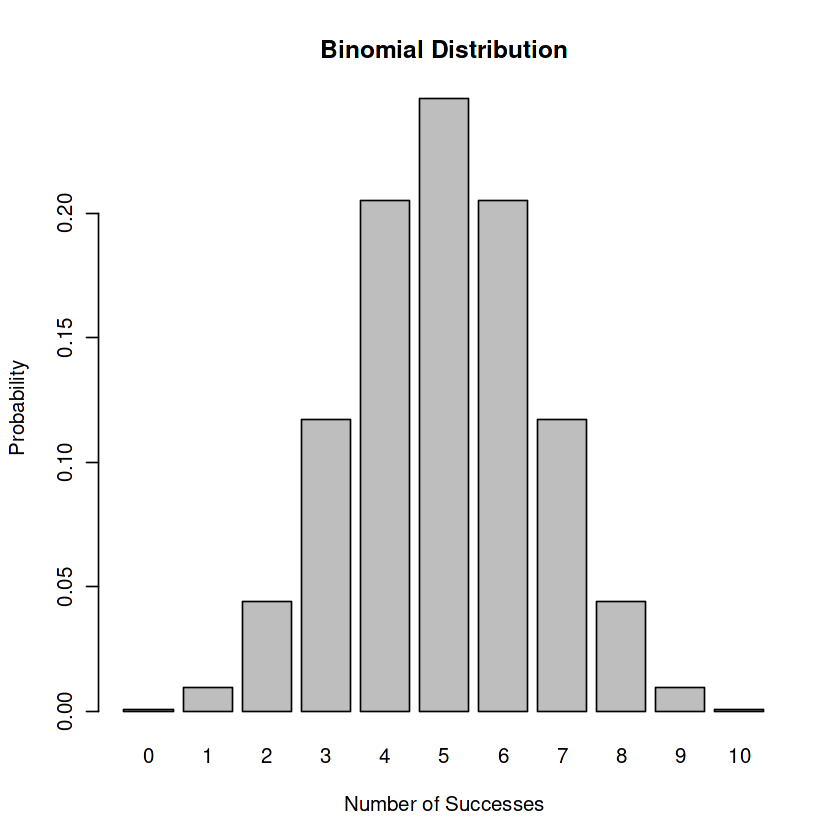

In [9]:
barplot(dbinom(0:10, size = 10, prob = 0.5), names.arg = 0:10,
        main = "Binomial Distribution",
        xlab = "Number of Successes", ylab = "Probability")

In [10]:
dbinom(x=2, size=5, p=0.1)

[1] 0.0729

This returned 0.0729, the probability of **observing exactly x = 2 successes** in size = 5 trials, where the probability of success for each trial is p = 0.1.

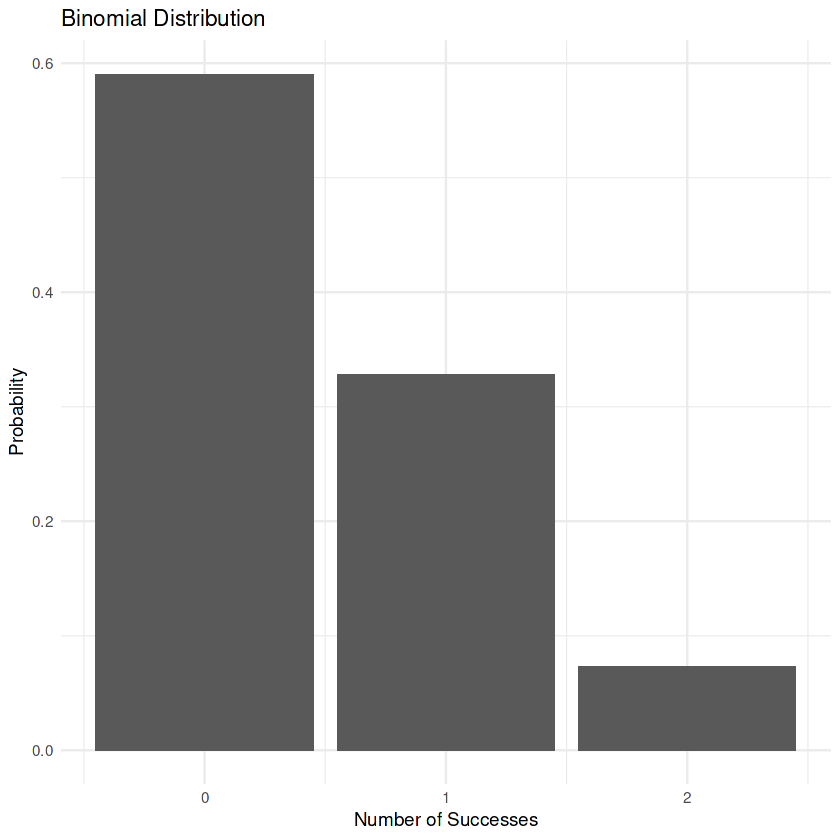

In [11]:
# Create a dataframe
binom_data <- data.frame(0:2, dbinom(0:2, size = 5, prob = 0.1))

# Plot using ggplot2
ggplot(binom_data, aes(x = 0:2, y = dbinom(0:2, size = 5, prob = 0.1))) +
  geom_bar(stat = "identity") +
  labs(title = "Binomial Distribution",
       x = "Number of Successes",
       y = "Probability") +
  theme_minimal()

Consider the following question: If the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200 clicks?

For our question above, 

we use x = 0, size = 200, and p = 0.02.

In [12]:
dbinom(x=0, size=200, p=0.02)

[1] 0.01758795

Often we are interested in determining the probability of x or fewer successes in n trials. In this case, we use the function pbinom:

In [13]:
pbinom(2, 5, 0.1)

[1] 0.99144

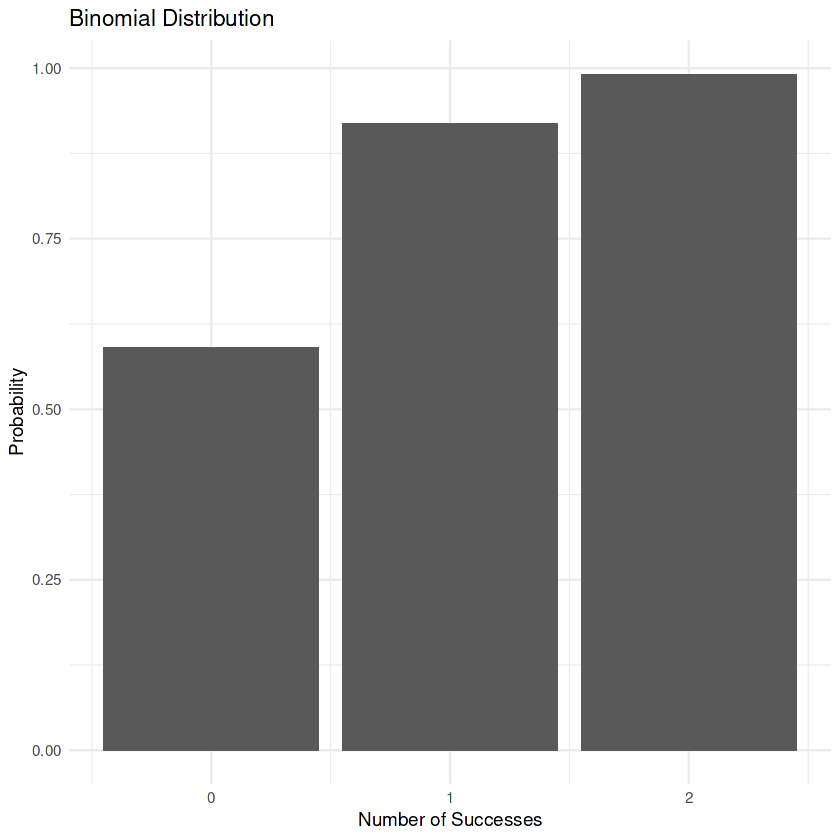

In [14]:
# Create a dataframe
binom_data <- data.frame(0:2, pbinom(0:2, 5, 0.1))

# Plot using ggplot2
ggplot(binom_data, aes(x = 0:2, y = pbinom(0:2, 5, 0.1))) +
  geom_bar(stat = "identity") +
  labs(title = "Binomial Distribution",
       x = "Number of Successes",
       y = "Probability") +
  theme_minimal()

This returned 0.9914, the probability of **observing two or fewer successes** in five trials, where the probability of success for each trial is 0.1.


The **mean** of a binomial distribution is **n × p**; you can also think of this as the expected number of successes in n trials, for success probability = p.
<br>The **variance** is **n × p(1 − p)** . 

With a large enough number of trials (particularly when p is close to 0.50), the binomial distribution is virtually indistinguishable from the
normal distribution.

Binomial outcomes are important to model, since they represent, among other
things, fundamental decisions (buy or don’t buy, click or don’t click, survive or die, etc.).

A binomial trial is an experiment with two possible outcomes: one with probability p and the other with probability 1 – p.

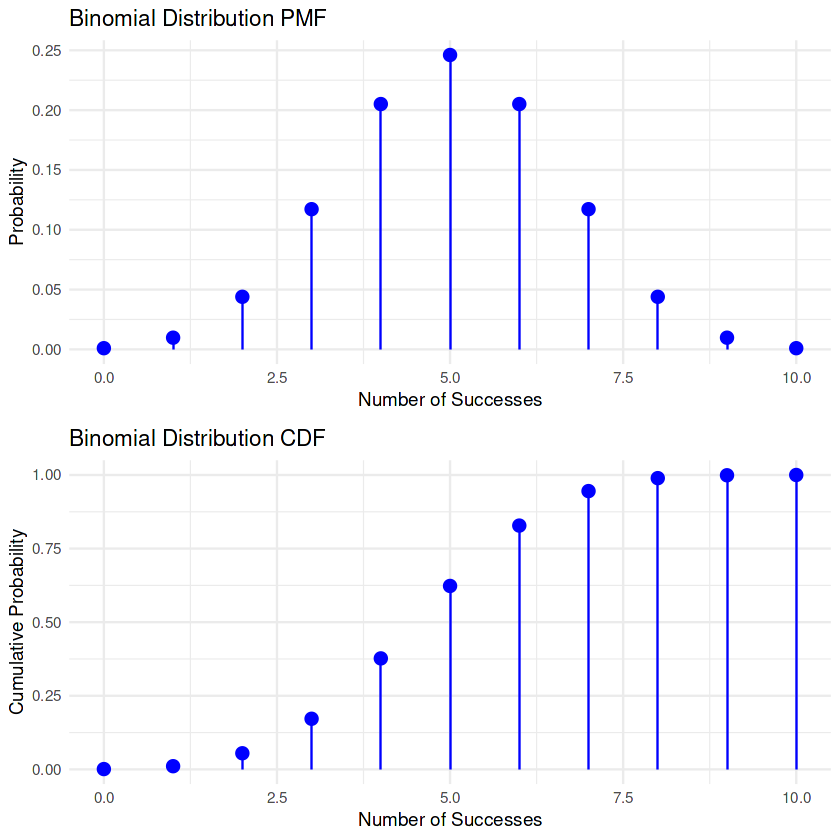

In [15]:
# Define parameters
n <- 10    # Number of trials
p <- 0.5   # Probability of success
x <- 0:n   # Possible outcomes

# Create Data Frame
data <- data.frame(
  x = rep(x, 2),
  y = c(dbinom(x, n, p), pbinom(x, n, p)),
  type = rep(c("PMF", "CDF"), each = length(x))
)

# Function to create plot
plot_binom <- function(plot_type, y_label, title) {
  ggplot(subset(data, type == plot_type), aes(x = x, y = y)) +
    geom_point(size = 3, color = "blue") +
    geom_segment(aes(xend = x, yend = 0), color = "blue") +
    labs(title = title, x = "Number of Successes", y = y_label) +
    theme_minimal()
}

# Generate plots
p1 <- plot_binom("PMF", "Probability", "Binomial Distribution PMF")
p2 <- plot_binom("CDF", "Cumulative Probability", "Binomial Distribution CDF")

# Arrange plots vertically
grid.arrange(p1, p2, ncol = 1)

## **10. CHI-SQUARE DISTRIBUTION**

The chi-squared distribution with degrees of freedom is the distribution of a sum of the squares of independent standard normal random variables.

A **low chi-square** value for a set of counts indicates that they *closely follow the expected distribution*. 
<br>A **high chi-square** indicates that they *differ markedly from what is expected*. 
<br>There are a variety of chi-square distributions associated with different degrees of freedom.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


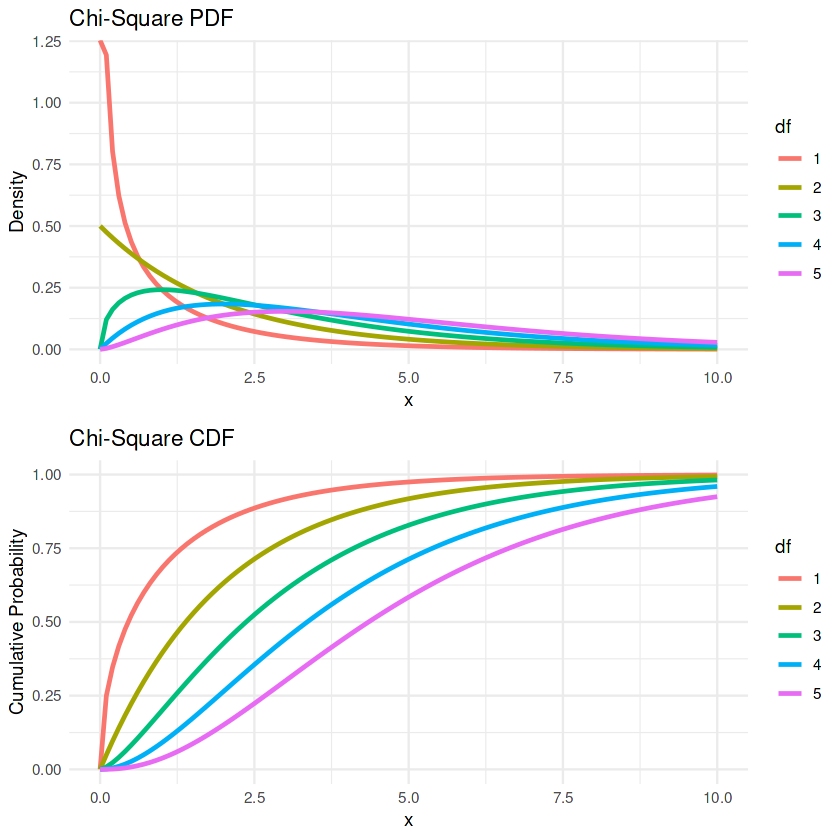

In [16]:
library(gridExtra)

df_values <- c(1,2,3,4,5)  # Degrees of freedom
x <- seq(0, 10, length = 100)

plot_chisq <- function(fun, y_label, title) {
  data <- do.call(rbind, lapply(df_values, function(df) {
    data.frame(x = x, y = fun(x, df), df = factor(df))
  }))
  
  ggplot(data, aes(x = x, y = y, color = df)) +
    geom_line(size = 1) +
    labs(title = title, x = "x", y = y_label) +
    theme_minimal()
}

p1 <- plot_chisq(dchisq, "Density", "Chi-Square PDF")
p2 <- plot_chisq(pchisq, "Cumulative Probability", "Chi-Square CDF")

grid.arrange(p1, p2, ncol = 1)


## **11. F-DISTRIBUTION**

The F-distribution is a continuous probability distribution that arises frequently in ANOVA (Analysis of Variance) and hypothesis testing for comparing variances.

It is the ratio of two independent chi-square random variables over their degrees od freedom.

The F-distribution is used with experiments and linear models involving measured
data.

The F-statistic compares variation due to factors of interest to overall variation.

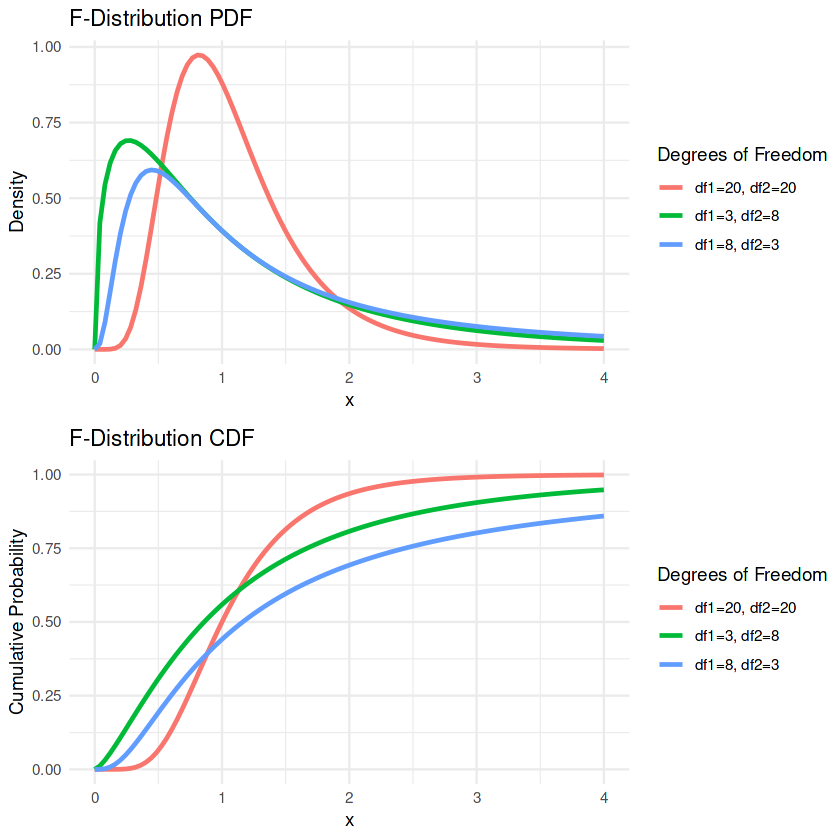

In [17]:
# Define degrees of freedom
df_pairs <- list(c(3, 8), c(8, 3), c(20, 20))
x <- seq(0, 4, length = 100)

# Function to generate plot
plot_fdist <- function(fun, y_label, title) {
  data <- do.call(rbind, lapply(df_pairs, function(df) {
    data.frame(x = x, y = fun(x, df[1], df[2]), 
               df_label = paste0("df1=", df[1], ", df2=", df[2]))
  }))
  
  ggplot(data, aes(x = x, y = y, color = df_label)) +
    geom_line(size = 1) +
    labs(title = title, x = "x", y = y_label, color = "Degrees of Freedom") +
    theme_minimal()
}

# Generate plots
p1 <- plot_fdist(df, "Density", "F-Distribution PDF")
p2 <- plot_fdist(pf, "Cumulative Probability", "F-Distribution CDF")

# Arrange plots vertically
grid.arrange(p1, p2, ncol = 1)

## **12. POISSON AND RELATED DISTRIBUTION**

**Lambda**: The rate (per unit of time or space) at which events occur.

For events that occur at a constant rate, the number of events per unit of time or space can be modeled as a Poisson distribution.

You can also model the time or distance between one event and the next as an
exponential distribution.

A changing event rate over time (e.g., an increasing probability of device failure) can be modeled with the Weibull distribution.

### **A. Poisson Distribution**

The frequency distribution of the number of events in sampled units of time or space is called the Poisson Distribution.
<br>The key parameter in a Poisson distribution is λ, or lambda. This is the mean number of events that occurs in a specified interval of time or space. The variance for a Poisson distribution is also λ.

[1] 6 1 2 1 3 1 1 2 2 2 4 0 4 0 2 3 0 3 1 1 1 0 2 1 4 2 1 3 0 3 3 3 2 0 2 3 0
 [38] 4 1 2 2 0 5 1 5 2 2 1 3 6 1 2 1 0 2 1 0 0 2 2 2 2 0 3 0 1 7 0 1 0 2 1 1 0
 [75] 4 6 1 3 3 4 3 1 1 1 1 1 3 2 4 4 2 3 0 2 3 0 1 1 2 3 4

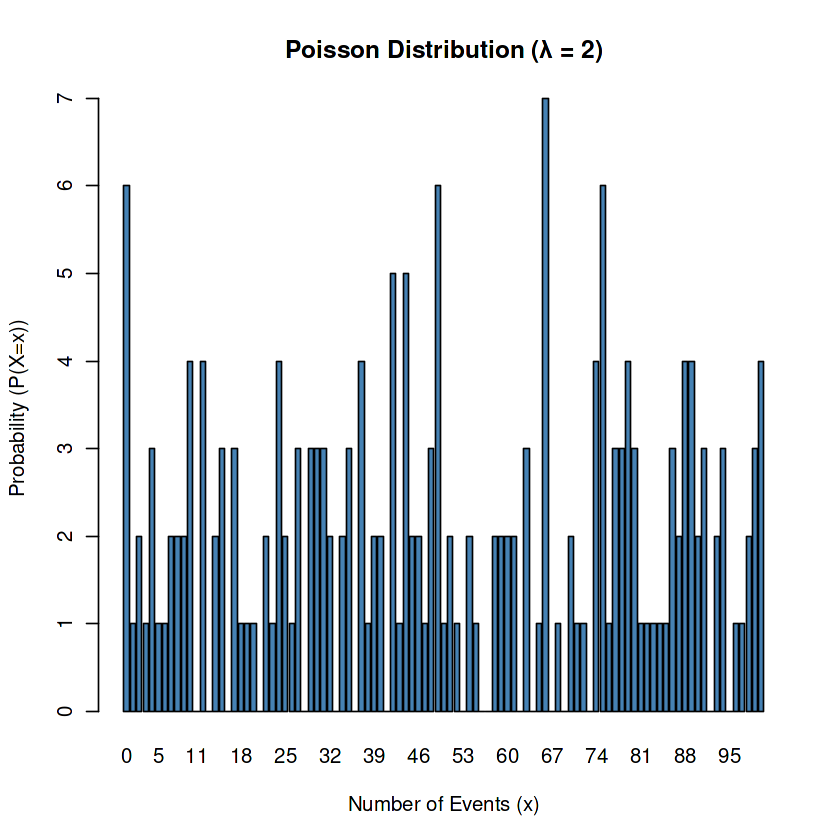

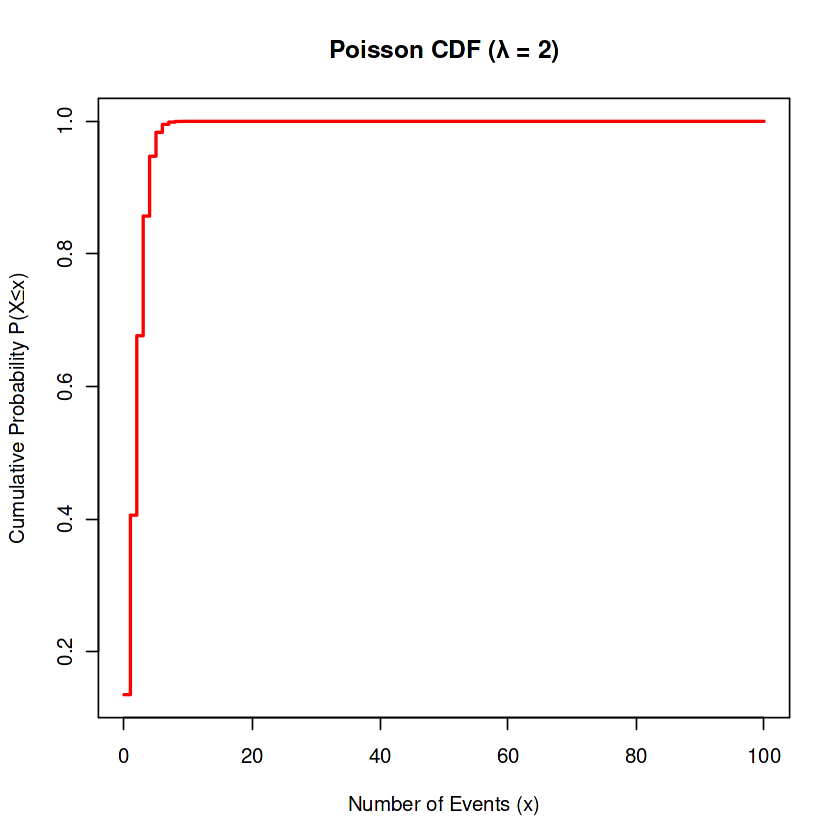

In [18]:
lambda <- 2  # Mean number of events
x <- 0:100    # Range of possible values
data <- rpois(x, lambda)
data

# Poisson PMF Visualization
barplot(data, names.arg = x,
        main = "Poisson Distribution (λ = 2)", col = 'steel blue',
        xlab = "Number of Events (x)", ylab = "Probability (P(X=x))")

# Poisson CDF Visualization
plot(x, ppois(x, lambda), type = "s", col = 'red', lwd = 2,
     main = "Poisson CDF (λ = 2)",
     xlab = "Number of Events (x)", ylab = "Cumulative Probability P(X≤x)")

### **B. Exponential distribution** 

The frequency distribution of the time or distance from one event to the next event is called the Exponential distribution.

The R code to generate random numbers from an exponential distribution
takes two arguments: **n** (the quantity of numbers to be generated) and **rate** (the number of events per time period).

The below code would generate 100 random numbers from an exponential distribution where the mean number of events per time period is 0.2.

[1]  3.98579031 16.87925294  5.22485283  1.15256030  2.42859317  1.06492372
  [7]  0.71167796  1.03431368  4.82057735  6.08974577 11.61446066  0.60595490
 [13]  1.27477291  0.97915388  0.93088613  7.45168647  0.59898397  4.31982459
 [19]  4.19818929  3.78279374  1.59491958  3.37760890  3.93760304  4.07100945
 [25]  4.36372534  4.80036167  1.32051767  4.81915310  6.21144095  3.30457180
 [31]  2.25427239  0.30837334  9.69493528  0.49106361  7.92894671  1.25153828
 [37] 13.44442681  5.01960213  0.72725795  8.86011614  0.58825449  0.57655410
 [43]  5.55591620  7.99140449  2.35577832  1.58673376 18.93305193  2.25997932
 [49]  1.88297365  3.96986727  3.03353900  1.21687086  4.70861925  5.56581880
 [55]  6.21140021  0.99701615  3.43211773  6.35724451  0.34135653  3.85241536
 [61]  1.59913512  1.99149906  9.34878147  5.41149345 21.60990275  5.63942264
 [67]  7.80867943  2.73934552  0.18618733  7.99329063  7.62961975  0.30395307
 [73]  1.86500435  1.91395097  0.80187711  1.88583485  2.05876735  2.50323513
 [79]  7.85179248  3.67544583  5.77130984 29.94948737  1.10829554  9.63127304
 [85]  3.50499763  4.76905967  4.40509302  8.38661597  3.44489012  1.92620639
 [91]  8.31515917  2.39646673  0.03589996  3.16396681  0.26088439  9.01052877
 [97]  2.43066868  0.81518157 11.28396341  4.44534367

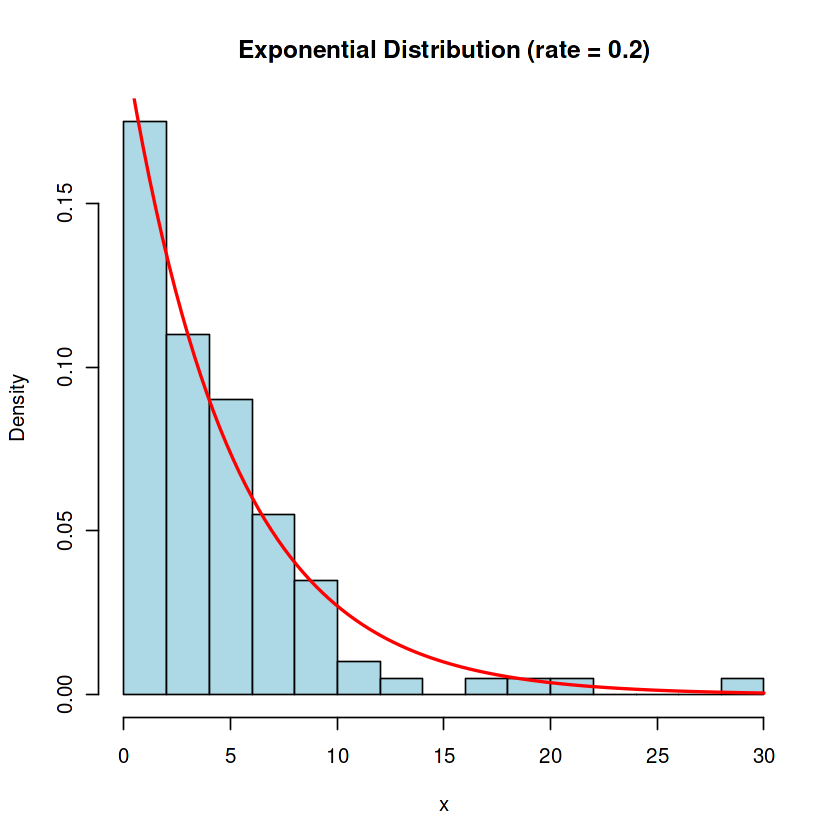

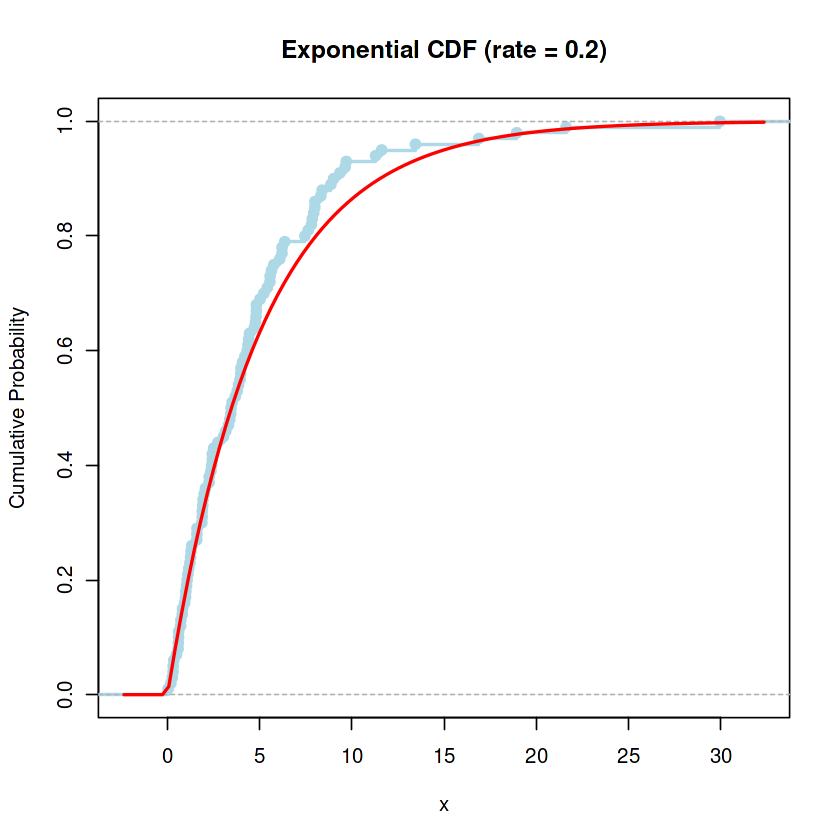

In [19]:
data <- rexp(n=100, rate=0.2)
data

# Plot the Probability Density Function (PDF)
hist(data, probability = TRUE, col = "lightblue", breaks = 20, 
     main = "Exponential Distribution (rate = 0.2)", 
     xlab = "x", ylab = "Density")
curve(dexp(x, rate = 0.2), col = "red", lwd = 2, add = TRUE)

# Plot the Cumulative Distribution Function (CDF)
plot(ecdf(data), main = "Exponential CDF (rate = 0.2)", 
     xlab = "x", ylab = "Cumulative Probability", col = "lightblue", lwd = 2)
curve(pexp(x, rate = 0.2), col = "red", lwd = 2, add = TRUE)

### **C. Weibull distribution**

A generalized version of the exponential distribution in which the event rate is allowed to shift over time is the Weibull distribution.

The R code to generate random numbers from a Weibull distribution takes three arguments: n (the quantity of numbers to be generated), shape, and scale. 

For example,
the following code would generate 100 random numbers (lifetimes) from a Weibull distribution with shape of 1.5 and characteristic life of 5,000

[1]  6156.8770 12667.0306  2840.1201  5068.4853  2429.8530 12510.5147
  [7]  5052.6088  9695.9697  7393.6038  3339.1460   244.7037  2980.3432
 [13]  2906.8001  2161.4264  8377.5016  6172.0290  9159.3383  2578.3561
 [19]  9561.6117  1310.8171  5264.0569  5424.0505  3868.1619  2420.1544
 [25]  1496.1174 10504.3935  3191.2796  5156.8901  9719.1043  3941.6088
 [31]  1554.4840  2547.9533  3910.2721  7231.0094  6317.3764  4730.5212
 [37]  3945.3302  3570.6988  3566.8004  1721.9283  4481.9561  1929.9456
 [43]  7389.5862  4427.7020  5511.5221  3092.5904  5003.0479  3101.7229
 [49]  6994.3239  6634.3777   363.8213   210.6950 12518.7398  3314.8432
 [55]  7011.6265  2617.3452  8792.4675  8940.5901  4015.5077  4660.3626
 [61]  6987.9711  4472.2046  1818.9229  1906.8903  2725.7158  2593.4507
 [67]  2414.9104  4558.0546  4565.4241  2614.5280  6528.8174  2864.6665
 [73]  9161.9208  1477.5823  5330.8370  1329.6461  5361.3208  2559.5721
 [79]  5659.2016  8149.1062  3229.0144  4904.6375  2739.2868  5099.3465
 [85]  9248.5050   807.5612  1365.2744  4579.4281  6048.4208  6127.0556
 [91]  1791.8951   420.2498 11858.7646   766.7307  3011.6780  4266.0869
 [97]  5546.9671  2546.7915  8007.0258  8104.2333

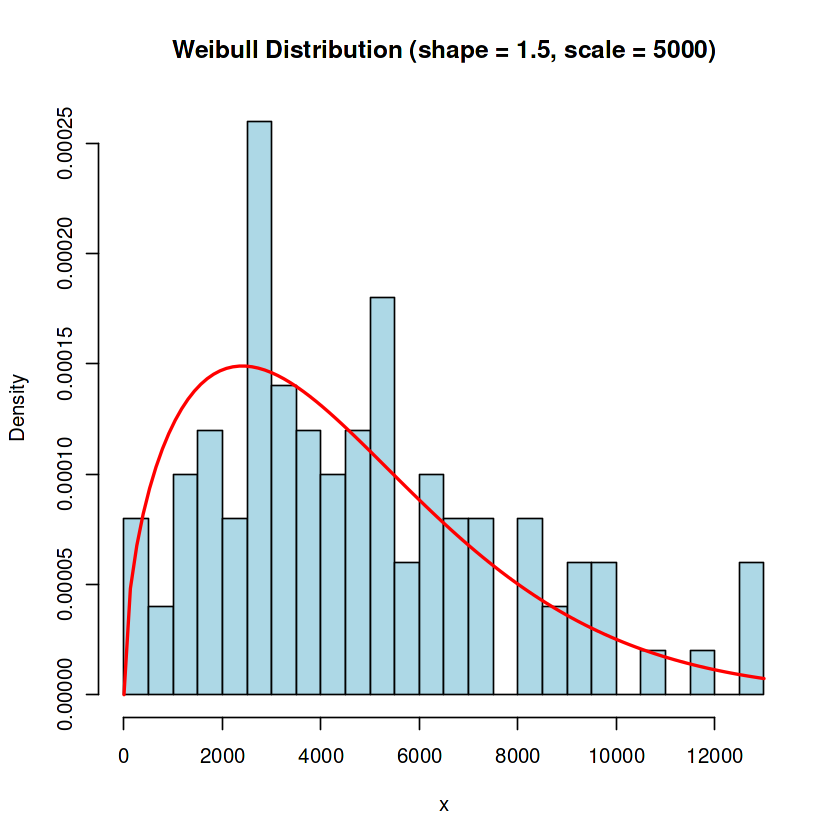

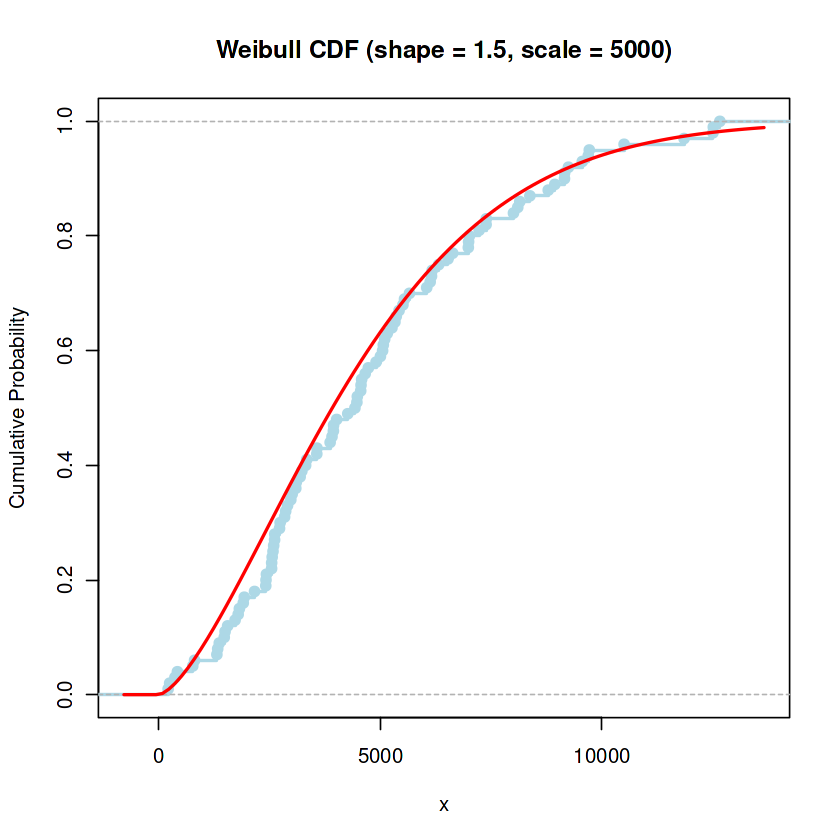

In [20]:
data <- rweibull(100, 1.5, 5000)
data

# Plot the Probability Density Function (PDF)
hist(data, probability = TRUE, col = "lightblue", breaks = 20, 
     main = "Weibull Distribution (shape = 1.5, scale = 5000)", 
     xlab = "x", ylab = "Density")
curve(dweibull(x, shape = 1.5, scale = 5000), col = "red", lwd = 2, add = TRUE)

# Plot the Cumulative Distribution Function (CDF)
plot(ecdf(data), main = "Weibull CDF (shape = 1.5, scale = 5000)", 
     xlab = "x", ylab = "Cumulative Probability", col = "lightblue", lwd = 2)
curve(pweibull(x, shape = 1.5, scale = 5000), col = "red", lwd = 2, add = TRUE)